# Trabalho Final - Dengue 2025

## Importando bibliotecas do projeto

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import glob
import pyarrow.dataset as ds
from pandas.api.types import is_string_dtype
from dbfread import DBF
import locale
locale.setlocale(locale.LC_ALL, "pt_BR.UTF-8")

'pt_BR.UTF-8'

funcoes

In [3]:
def ibge_to_sinan(cod_ibge:str):
    """
    Converte código IBGE (7 dígitos) para código SINAN (6 dígitos).
    - Remove o dígito verificador (último dígito do IBGE)
    - Elimina zeros à esquerda do código do município
    """
    s = str(cod_ibge).zfill(7)   # garante 7 dígitos
    uf = s[:2]
    municipio_5 = s[2:-1]        # 5 dígitos do município (sem DV)
    
    municipio_int = int(municipio_5)  # remove zeros à esquerda
    return uf + str(municipio_int).zfill(4)

In [4]:
# Exemplo de formatação
def fmt_br(valor):
    return locale.format_string("%.2f", valor, grouping=True)

In [5]:
df_dengue2023 = pd.read_parquet(r"../data/DENGBR23.parquet", engine="pyarrow")
df_dengue2024 = pd.read_parquet(r"../data/DENGBR24.parquet", engine="pyarrow")
df_regions = pd.read_excel(r"../data/POP.xlsx")
#UF	COD. UF	COD. MUNIC	NOME DO MUNICÍPIO
df_regions.columns = ['UF','COD_UF','COD_MUNIC','NOME_DO_MUNICIPIO']

df_concat_dengue = pd.concat([df_dengue2023,df_dengue2024])
df_concat_dengue.head()

#print(df_dengue2023.shape, df_dengue2023.head())

# Leia todos os arquivos Parquet da lista
#df_dengue2023 = pd.read_parquet(caminho_da_pasta)

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
0,2,A90,20230608,202323,2023,31,313760,1449,2120542,20230606,...,,,,,2,,20230614,0,,
1,2,A90,20230608,202323,2023,31,317020,1462,2152967,20230607,...,,,,,2,,20230713,0,,
2,2,A90,20230608,202323,2023,31,317020,1462,3170527,20230514,...,,,,,2,,20230620,0,,
3,2,A90,20230608,202323,2023,31,314010,1471,2119323,20230518,...,,,,,2,,20230609,0,,
4,2,A90,20230608,202323,2023,31,317010,1461,2164817,20230607,...,,,,,2,,20230710,1,,


In [6]:
df_regions.head()

,UF,COD_UF,COD_MUNIC,NOME_DO_MUNICIPIO
0,RO,11,15,Alta Floresta D'Oeste
1,RO,11,23,Ariquemes
2,RO,11,31,Cabixi
3,RO,11,49,Cacoal
4,RO,11,56,Cerejeiras


In [7]:
df_concat_dengue['DT_CHIK_S1'].unique()

array(['        ', '20230609', '20230616', '20230620', '20230621',
       '20230703', '20230705', '20230804', '20230818', '20231016',
       '20231103', '20231113', '20231205', '20231218', '20231213',
       '20231214', '20231221', '20231222', '20231227', '20240102',
       '20230613', '20230619', '20230711', '20231127', '20231128',
       '20231229', '20230522', '20230524', '20230514', '20230512',
       '20230515', '20230504', '20230426', '20230517', '20230404',
       '20230403', '20230413', '20230418', '20230503', '20230519',
       '20230523', '20230530', '20230425', '20230427', '20230417',
       '20230411', '20230424', '20230509', '20230429', '20230502',
       '20231002', '20230612', '20230704', '20230801', '20230726',
       '20230807', '20230405', '20230412', '20231019', '20231107',
       '20231129', '20230929', '20231108', '20230707', '20231121',
       '20230627', '20231208', '20230808', '20230111', '20230112',
       '20230115', '20230129', '20230203', '20230208', '202302

In [8]:
df_regions["COD_UF"] = df_regions["COD_UF"].astype(str).str.zfill(2)
df_regions["COD_MUNIC"] = df_regions["COD_MUNIC"].astype(str).str.zfill(5)



df_regions.head()
df_regions['COD_IBGE'] = df_regions['COD_UF'].astype(str) + df_regions['COD_MUNIC'].astype(str)
df_regions['COD_SINAN'] = df_regions['COD_IBGE'].apply(ibge_to_sinan)


In [9]:
df_regions.head()

,UF,COD_UF,COD_MUNIC,NOME_DO_MUNICIPIO,COD_IBGE,COD_SINAN
0,RO,11,00015,Alta Floresta D'Oeste,1100015,110001
1,RO,11,00023,Ariquemes,1100023,110002
2,RO,11,00031,Cabixi,1100031,110003
3,RO,11,00049,Cacoal,1100049,110004
4,RO,11,00056,Cerejeiras,1100056,110005


In [10]:
df_regions.tail()

,UF,COD_UF,COD_MUNIC,NOME_DO_MUNICIPIO,COD_IBGE,COD_SINAN
5566,GO,52,22005,Vianópolis,5222005,522200
5567,GO,52,22054,Vicentinópolis,5222054,522205
5568,GO,52,22203,Vila Boa,5222203,522220
5569,GO,52,22302,Vila Propício,5222302,522230
5570,DF,53,00108,Brasília,5300108,530010


In [11]:
##SG_UF_NOT
test = df_concat_dengue.query('SG_UF_NOT == "53"')
test.head()

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
852,2,A90,20230612,202324,2023,53,530010,,0010499,20230609,...,,,,,2,,20230614,1,,
1038,2,A90,20230613,202324,2023,53,530010,,0010529,20230604,...,,,,,2,,20230613,1,,
4370,2,A90,20230630,202326,2023,53,530010,,3019608,20230628,...,,,,,2,,20230703,1,,
6368,2,A90,20230802,202331,2023,53,530010,,3027694,20230801,...,,,,,2,,20230802,1,,
8354,2,A90,20231002,202340,2023,53,530010,,9748202,20230930,...,,,,,2,,20231020,1,,


In [12]:
df_concat_dengue.shape

(7935706, 121)

Merge

In [13]:
df_merge_dengue = pd.merge(df_concat_dengue,df_regions,left_on=['SG_UF_NOT','ID_MUNICIP'],right_on=['COD_UF','COD_SINAN'], how='left')

In [14]:
df_merge_dengue.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7935706 entries, 0 to 7935705
Data columns (total 127 columns):
 #    Column             Dtype 
---   ------             ----- 
 0    TP_NOT             object
 1    ID_AGRAVO          object
 2    DT_NOTIFIC         object
 3    SEM_NOT            object
 4    NU_ANO             object
 5    SG_UF_NOT          object
 6    ID_MUNICIP         object
 7    ID_REGIONA         object
 8    ID_UNIDADE         object
 9    DT_SIN_PRI         object
 10   SEM_PRI            object
 11   ANO_NASC           object
 12   NU_IDADE_N         object
 13   CS_SEXO            object
 14   CS_GESTANT         object
 15   CS_RACA            object
 16   CS_ESCOL_N         object
 17   SG_UF              object
 18   ID_MN_RESI         object
 19   ID_RG_RESI         object
 20   ID_PAIS            object
 21   DT_INVEST          object
 22   ID_OCUPA_N         object
 23   FEBRE              object
 24   MIALGIA            object
 25   CEFALEIA        

In [15]:
print("\n" + "="*50)
print("Análise de Memória Após a Otimização")
print("="*50)
memory_before = round(df_merge_dengue.memory_usage(deep=True).sum() / 1024**2,2)
print(f"Uso de memória final: {memory_before} MB")
print("\nTipos de dados finais:")
print(df_merge_dengue.info(verbose=True))


Análise de Memória Após a Otimização
Uso de memória final: 49859.48 MB

Tipos de dados finais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7935706 entries, 0 to 7935705
Data columns (total 127 columns):
 #    Column             Dtype 
---   ------             ----- 
 0    TP_NOT             object
 1    ID_AGRAVO          object
 2    DT_NOTIFIC         object
 3    SEM_NOT            object
 4    NU_ANO             object
 5    SG_UF_NOT          object
 6    ID_MUNICIP         object
 7    ID_REGIONA         object
 8    ID_UNIDADE         object
 9    DT_SIN_PRI         object
 10   SEM_PRI            object
 11   ANO_NASC           object
 12   NU_IDADE_N         object
 13   CS_SEXO            object
 14   CS_GESTANT         object
 15   CS_RACA            object
 16   CS_ESCOL_N         object
 17   SG_UF              object
 18   ID_MN_RESI         object
 19   ID_RG_RESI         object
 20   ID_PAIS            object
 21   DT_INVEST          object
 22   ID_OCUPA_N      

In [16]:
numeric_cols = {
    'NU_ANO': pd.Int16Dtype(),
    'ANO_NASC': pd.Int16Dtype(),
    'NU_IDADE_N': pd.Int16Dtype(),
    'FEBRE': pd.Int8Dtype(),
    'ALRM_HIPOT': pd.Int8Dtype(),
    'ALRM_PLAQ': pd.Int8Dtype(),
    'ALRM_VOM': pd.Int8Dtype(),
    'ALRM_SANG': pd.Int8Dtype(),
    'ALRM_HEMAT': pd.Int8Dtype(),
    'ALRM_ABDOM': pd.Int8Dtype(),
    'ALRM_LETAR': pd.Int8Dtype(),
    'ALRM_HEPAT': pd.Int8Dtype(),
    'ALRM_LIQ': pd.Int8Dtype(),
    'GRAV_PULSO': pd.Int8Dtype(),
    'GRAV_CONV': pd.Int8Dtype(),
    'GRAV_ENCH': pd.Int8Dtype(),
    'GRAV_INSUF': pd.Int8Dtype(),
    'GRAV_TAQUI': pd.Int8Dtype(),
    'GRAV_HIPOT': pd.Int8Dtype(),
    'GRAV_HEMAT': pd.Int8Dtype(),
    'GRAV_MELEN': pd.Int8Dtype(),
    'GRAV_METRO': pd.Int8Dtype(),
    'GRAV_SANG': pd.Int8Dtype(),
    'GRAV_AST': pd.Int8Dtype(),
    'GRAV_MIOC': pd.Int8Dtype(),
    'GRAV_CONSC': pd.Int8Dtype(),
    'GRAV_ORGAO': pd.Int8Dtype(),
    'MIALGIA': pd.Int8Dtype(),
    'CEFALEIA': pd.Int8Dtype(),
    'EXANTEMA': pd.Int8Dtype(),
    'VOMITO': pd.Int8Dtype(),
    'NAUSEA': pd.Int8Dtype(),
    'DOR_COSTAS': pd.Int8Dtype(),
    'CONJUNTVIT': pd.Int8Dtype(),
    'ARTRITE': pd.Int8Dtype(),
    'ARTRALGIA': pd.Int8Dtype(),
    'PETEQUIA_N': pd.Int8Dtype(),
    'LEUCOPENIA': pd.Int8Dtype(),
    'LACO': pd.Int8Dtype(),
    'DOR_RETRO': pd.Int8Dtype(),
    'DIABETES': pd.Int8Dtype(),
    'HEMATOLOG': pd.Int8Dtype(),
    'HEPATOPAT': pd.Int8Dtype(),
    'RENAL': pd.Int8Dtype(),
    'HIPERTENSA': pd.Int8Dtype(),
    'ACIDO_PEPT': pd.Int8Dtype(),
    'TP_SISTEMA': pd.Int8Dtype(),
    'NDUPLIC_N': pd.Int8Dtype(),
    'CS_FLXRET': pd.Int8Dtype(),
    'AUTO_IMUNE': pd.Int8Dtype()
}

# 2. Colunas categóricas:
categorical_cols = [
    'TP_NOT', 'ID_AGRAVO', 'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA',
    'ID_UNIDADE', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N',
    'SG_UF', 'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'ID_OCUPA_N',
    'RESUL_SORO', 'RESUL_NS1', 'RESUL_VI_N', 'RESUL_PCR', 'SOROTIPO',
    'HISTOPA_N', 'IMUNOH_N', 'HOSPITALIZ', 'COUFINF', 'MUNICIPIO',
    'TPAUTOCTO', 'CLASSI_FIN', 'CRITERIO', 'EVOLUCAO','MANI_HEMOR','EPISTAXE',
    'GENGIVO','METRO','PETEQUIAS','HEMATURA','SANGRAM','LACO_N','PLASMATICO',
    'EVIDENCIA','PLAQ_MENOR','CON_FHD','COMPLICA','FLXRECEBI','MIGRADO_W',
    'UF_y','COD_UF','COD_MUNIC','NOME_DO_MUNICIPIO','COD_IBGE','COD_SINAN'
]

# 3. Colunas de data:
date_cols = [
    'DT_NOTIFIC', 'DT_SIN_PRI', 'DT_INVEST', 'DT_COLETA',
    'DT_NS1', 'DT_VIRAL', 'DT_PCR', 'DT_INTERNA', 'DT_ENCERRA',
    'DT_OBITO','DT_ALRM','DT_GRAV','DT_DIGITA',''
]

# --- Aplicação das Conversões ---

print("\nIniciando processo de conversão de tipos...")

for col, dtype in numeric_cols.items():
    if col in df_merge_dengue.columns:
        df_merge_dengue[col] = pd.to_numeric(df_merge_dengue[col], errors='coerce').astype(dtype)

for col in categorical_cols:
    if col in df_merge_dengue.columns:
        df_merge_dengue[col] = df_merge_dengue[col].astype(str).astype('category')

for col in date_cols:
    if col in df_merge_dengue.columns:
        df_merge_dengue[col] = pd.to_datetime(df_merge_dengue[col], format="%Y%m%d", errors='coerce')


print("Conversão concluída!")


Iniciando processo de conversão de tipos...
Conversão concluída!


In [17]:
df_merge_dengue.head()

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W,UF_y,COD_UF,COD_MUNIC,NOME_DO_MUNICIPIO,COD_IBGE,COD_SINAN
0,2,A90,2023-06-08,202323,2023,31,313760,1449,2120542,2023-06-06,...,2023-06-14,0,,,MG,31,37601,Lagoa Santa,3137601,313760
1,2,A90,2023-06-08,202323,2023,31,317020,1462,2152967,2023-06-07,...,2023-07-13,0,,,MG,31,70206,Uberlândia,3170206,317020
2,2,A90,2023-06-08,202323,2023,31,317020,1462,3170527,2023-05-14,...,2023-06-20,0,,,MG,31,70206,Uberlândia,3170206,317020
3,2,A90,2023-06-08,202323,2023,31,314010,1471,2119323,2023-05-18,...,2023-06-09,0,,,MG,31,40100,Marilac,3140100,314010
4,2,A90,2023-06-08,202323,2023,31,317010,1461,2164817,2023-06-07,...,2023-07-10,1,,,MG,31,70107,Uberaba,3170107,317010


In [18]:
# --- Análise Final ---
print("\n" + "="*50)
print("Análise de Memória Após a Otimização")
print("="*50)
memory_after = round(df_merge_dengue.memory_usage(deep=True).sum() / 1024**2,2)
print(f"Uso de memória final: {memory_after} MB")
print("\nTipos de dados finais:")
print(df_merge_dengue.info(verbose=True))


Análise de Memória Após a Otimização
Uso de memória final: 8391.85 MB

Tipos de dados finais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7935706 entries, 0 to 7935705
Data columns (total 127 columns):
 #    Column             Dtype         
---   ------             -----         
 0    TP_NOT             category      
 1    ID_AGRAVO          category      
 2    DT_NOTIFIC         datetime64[ns]
 3    SEM_NOT            object        
 4    NU_ANO             Int16         
 5    SG_UF_NOT          category      
 6    ID_MUNICIP         category      
 7    ID_REGIONA         category      
 8    ID_UNIDADE         category      
 9    DT_SIN_PRI         datetime64[ns]
 10   SEM_PRI            object        
 11   ANO_NASC           Int16         
 12   NU_IDADE_N         Int16         
 13   CS_SEXO            category      
 14   CS_GESTANT         category      
 15   CS_RACA            category      
 16   CS_ESCOL_N         category      
 17   SG_UF              catego

In [19]:
memory_before.item()

49859.48

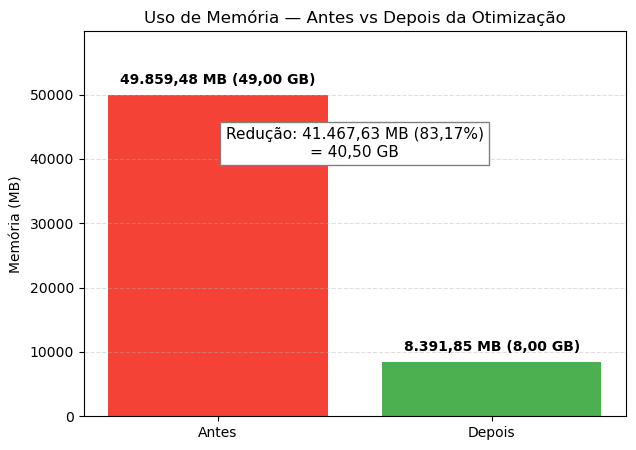

In [20]:
dados = pd.DataFrame({
    "Categoria": ["Valor Inicial", "Valor Final"],
    "Valor": [memory_before.item(), memory_after.item()]
})

# Cálculos
reducao_abs = memory_before - memory_after
reducao_pct = (reducao_abs / memory_before) * 100

# Gráfico
labels = ["Antes", "Depois"]
values = [memory_before, memory_after]
colors = ["#F44336", "#4CAF50"]  # vermelho, verde

plt.figure(figsize=(7,5))
bars = plt.bar(labels, values, color=colors)

# Anotar valores em MB e (GB)
for bar, val in zip(bars, values):
    mb_txt = f"{fmt_br(round(val,2))} MB"
    gb_txt = f" ({fmt_br(round(val/1024))} GB)"
    plt.annotate(mb_txt + gb_txt,
                 (bar.get_x() + bar.get_width()/2, bar.get_height()),
                 ha="center", va="bottom", fontsize=10, fontweight="bold",
                 xytext=(0, 6), textcoords="offset points")

# Texto central com redução
plt.annotate(f"Redução: {fmt_br(round(reducao_abs,2))} MB ({fmt_br(round(reducao_pct,2))}%)\n= {fmt_br(round(reducao_abs/1024,2))} GB",
             (0.5, max(values)*0.85),
             ha="center", va="center", fontsize=11,
             bbox=dict(facecolor="white", edgecolor="gray"))

plt.title("Uso de Memória — Antes vs Depois da Otimização")
plt.ylabel("Memória (MB)")
plt.ylim(0, max(values)*1.2)
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.show()

In [50]:
pd.set_option("display.max_columns", None)

In [21]:
df_merge_dengue.to_parquet("data_deduced.parquet",index=False)

## Dicionário de Dados -- Dataset DENGBR23 (Casos de Dengue -- Brasil 2023)

Este documento apresenta o mapeamento das colunas do dataset DENGBR23, contendo registros de casos de dengue notificados no Brasil em 2023. As definições foram extraídas e adaptadas a partir da documentação oficial do SINAN/DATASUS (Ministério da Saúde).

## Dicionário de Dados -- Dataset DENGBR23 (Casos de Dengue -- Brasil 2023)

Este documento apresenta o mapeamento das colunas do dataset DENGBR23, contendo registros de casos de dengue notificados no Brasil em 2023. As definições foram extraídas e adaptadas a partir da documentação oficial do SINAN/DATASUS (Ministério da Saúde).

### Campos de Identificação da Notificação

| Nome da Coluna | Descrição | Tipo de Dado |
|----------------|-----------|--------------|
| `tp_not` | Tipo de Notificação (1 = Negativa, 2 = Individual, 3 = Sarto, 4 = Agregado) | Texto (1) |
| `id_agravo` | Código CID-10 da doença (ex.: A90 = dengue clássica, A91 = dengue hemorrágica) | Texto (5) |
| `dt_notific` | Data da Notificação (quando a ficha foi preenchida) | Data |
| `sem_not` | Semana Epidemiológica da Notificação (AAAASS) | Texto (6) |
| `nu_ano` | Ano da notificação (AAAA) | Texto (4) |
| `sg_uf_not` | Unidade Federativa (UF) onde foi notificado o caso (sigla IBGE) | Texto (2) |
| `id_municip` | Município da notificação (código IBGE) | Texto (6) |
| `id_regiona` | Regional de saúde da notificação | Texto (8) |
| `id_unidade` | Unidade notificadora (CNES) | Texto (7) |

### Dados do Paciente

| Nome da Coluna | Descrição | Tipo de Dado |
|----------------|-----------|--------------|
| `dt_sin_pri` | Data de início dos primeiros sintomas | Data |
| `sem_pri` | Semana epidemiológica dos primeiros sintomas (AAAASS) | Texto (6) |
| `ano_nasc` | Ano de nascimento do paciente (AAAA) | Texto (4) |
| `nu_idade_n` | Idade (1=horas, 2=dias, 3=meses, 4=anos; ex.: 4018 = 18 anos) | Número (4) |
| `cs_sexo` | Sexo biológico (M=Masculino, F=Feminino, I=Ignorado) | Texto (1) |
| `cs_gestant` | Gestante (1=1º Tri; 2=2º Tri; 3=3º Tri; 4=Gestão ignorada; 5=Não; 6=Não se aplica; 9=Ignorado) | Texto (1) |
| `cs_raca` | Raça/cor (1=Branca, 2=Preta, 3=Amarela, 4=Parda, 5=Indígena, 9=Ignorado) | Texto (1) |
| `cs_escol_n` | Escolaridade (0=Analfabeto; 1=1ª-4ª incompleto; 2=4ª completo; ...; 8=Superior completo; 9=Ignorado; 10=Não se aplica) | Texto (2) |

### Dados de Residência e Procedência

| Nome da Coluna | Descrição | Tipo de Dado |
|----------------|-----------|--------------|
| `sg_uf` | Unidade Federativa de residência (sigla IBGE) | Texto (2) |
| `id_mn_resi` | Município de residência (código IBGE) | Texto (6) |
| `id_rg_resi` | Regional de saúde da residência | Texto (8) |
| `id_pais` | País de residência (se exterior) | Texto (4) |
| `dt_invest` | Data de início da investigação epidemiológica | Data |
| `id_ocupa_n` | Ocupação (CBO) | Texto (6) |

### Sinais e Sintomas Clínicos

Todos os campos abaixo: 1 = Sim, 2 = Não

- `febre` -- Presença de febre  
- `malgia` -- Dor muscular  
- `cefaleta` -- Dor de cabeça  
- `exantema` -- Manchas/vermelhidão na pele  
- `vomito` -- Episódios de vômito  
- `nausea` -- Náusea/enjoo  
- `dor_costas` -- Dor nas costas  
- `conjuntvit` -- Conjuntivite  
- `artrite` -- Artrite  
- `artralgia` -- Dor nas articulações  
- `petequia_n` -- Petéquias  
- `leucopenia` -- Leucopenia (exame de sangue)  
- `laco` -- Prova do laço positiva  
- `dor_retro` -- Dor retroorbital (atrás dos olhos)  

### Doenças Pré-existentes (Comorbidades)

Todos os campos abaixo: 1 = Sim, 2 = Não

- `diabetes` -- Diabetes mellitus  
- `hematolog` -- Doenças hematológicas  
- `hepatopat` -- Hepatopatias crônicas  
- `renal` -- Doença renal crônica  
- `hipertensa` -- Hipertensão arterial  
- `acido_pept` -- Doença ácido-péptica  
- `auto_imune` -- Doença autoimune  

### Exames Laboratoriais

| Nome da Coluna | Descrição | Tipo de Dado |
|----------------|-----------|--------------|
| `dt_coleta` | Data da coleta de sorologia IgM | Data |
| `resul_soro` | Resultado sorologia IgM (1=Reagente, 2=Não, 3=Inconclusivo, 4=Não realizado) | Texto (1) |
| `dt_ns1` | Data coleta exame NS1 | Data |
| `resul_ns1` | Resultado NS1 (1=Reagente, 2=Não, 3=Inconclusivo, 4=Não realizado) | Texto (1) |
| `dt_viral` | Data coleta isolamento viral | Data |
| `resul_vi_n` | Resultado isolamento viral | Texto (1) |
| `dt_per` | Data coleta RT-PCR | Data |
| `resul_per` | Resultado RT-PCR | Texto (1) |
| `sorotipo` | Sorotipo do vírus (1=DEN-1, 2=DEN-2, 3=DEN-3, 4=DEN-4) | Texto (1) |
| `histopa_n` | Resultado histopatologia | Texto (1) |
| `imunoh_n` | Resultado imunohistoquímica | Texto (1) |

### Hospitalização e Local da Infecção

| Nome da Coluna | Descrição | Tipo de Dado |
|----------------|-----------|--------------|
| `hospitaliz` | Paciente foi hospitalizado? (1=Sim, 2=Não, 9=Ignorado) | Texto (1) |
| `dt_interna` | Data da internação | Data |
| `coufinf` | UF provável da infecção | Texto (2) |
| `município` | Município provável da infecção | Texto (6) |
| `tpautocto` | Caso autóctone do município de residência? (1=Sim, 2=Não, 3=Indeterminado) | Texto (1) |

### Encerramento do Caso

| Nome da Coluna | Descrição | Tipo de Dado |
|----------------|-----------|--------------|
| `classi_fin` | Classificação final (1=Confirmado, 2=Descartado, 9=Ignorado) | Texto (2) |
| `criterio` | Critério de confirmação (1=Lab, 2=Clínico-epidemiológico, 3=Clínico, 4=Descartado) | Texto (1) |
| `dt_encerra` | Data de encerramento | Data |
| `evolucao` | Evolução (1=Cura, 2=Óbito por dengue, 3=Óbito por outras causas, 4=Óbito em investigação, 9=Ignorado) | Texto (1) |
| `dt_obito` | Data do óbito (se aplicável) | Data |

### 🦠 Exames laboratoriais de Chikungunya

| Variável     | Descrição                    | Valores possíveis                                  |
| ------------ | ---------------------------- | -------------------------------------------------- |
| `DT_CHIK_S1` | Data da coleta da 1ª amostra | Data (`AAAA-MM-DD`)                                |
| `DT_CHIK_S2` | Data da coleta da 2ª amostra | Data (`AAAA-MM-DD`)                                |
| `DT_PRNT`    | Data do exame PRNT           | Data (`AAAA-MM-DD`)                                |
| `DT_SORO`    | Data da sorologia            | Data (`AAAA-MM-DD`)                                |
| `RES_CHIKS1` | Resultado da 1ª amostra CHIK | 1=Positivo, 2=Negativo, 3=Inconclusivo, 9=Ignorado |
| `RES_CHIKS2` | Resultado da 2ª amostra CHIK | 1=Positivo, 2=Negativo, 3=Inconclusivo, 9=Ignorado |
| `RESUL_PRNT` | Resultado do exame PRNT      | 1=Positivo, 2=Negativo, 3=Inconclusivo, 9=Ignorado |


### 🌍 Identificação geográfica

| Variável    | Descrição                          | Valores possíveis           |
| ----------- | ---------------------------------- | --------------------------- |
| `UF`        | Unidade da federação (IBGE 2 díg.) | Ex: 11=RO, 13=AM, etc.      |
| `COPAISINF` | País de infecção                   | Código do país (076=Brasil) |
| `COMUNINF`  | Comunidade/local da infecção       | Código local, variável      |


### 🏥 Dados clínicos da doença

| Variável     | Descrição                            | Valores possíveis              |
| ------------ | ------------------------------------ | ------------------------------ |
| `DOENCA_TRA` | Doença relacionada ao trabalho       | 1=Sim, 2=Não, 9=Ignorado       |
| `CLINC_CHIK` | Classificação clínica da Chikungunya | 1=Aguda, 2=Crônica, 9=Ignorado |


### Sinais de Alarme

| Variável     | Descrição                              | Valores possíveis        |
| ------------ | -------------------------------------- | ------------------------ |
| `ALRM_HIPOT` | Hipotensão                             | 1=Sim, 2=Não, 9=Ignorado |
| `ALRM_PLAQ`  | Plaquetopenia                          | 1=Sim, 2=Não, 9=Ignorado |
| `ALRM_VOM`   | Vômitos persistentes                   | 1=Sim, 2=Não, 9=Ignorado |
| `ALRM_SANG`  | Sangramento                            | 1=Sim, 2=Não, 9=Ignorado |
| `ALRM_HEMAT` | Hematócrito aumentado                  | 1=Sim, 2=Não, 9=Ignorado |
| `ALRM_ABDOM` | Dor abdominal                          | 1=Sim, 2=Não, 9=Ignorado |
| `ALRM_LETAR` | Letargia                               | 1=Sim, 2=Não, 9=Ignorado |
| `ALRM_HEPAT` | Hepatomegalia                          | 1=Sim, 2=Não, 9=Ignorado |
| `ALRM_LIQ`   | Derrame cavitário                      | 1=Sim, 2=Não, 9=Ignorado |
| `DT_ALRM`    | Data da ocorrência de sinais de alarme | Data (`AAAA-MM-DD`)      |


### 🚨 Critérios de Gravidade

| Variável     | Descrição                                 | Valores possíveis        |
| ------------ | ----------------------------------------- | ------------------------ |
| `GRAV_PULSO` | Pulso fraco/filiforme                     | 1=Sim, 2=Não, 9=Ignorado |
| `GRAV_CONV`  | Convulsão                                 | 1=Sim, 2=Não, 9=Ignorado |
| `GRAV_ENCH`  | Tempo de enchimento capilar prolongado    | 1=Sim, 2=Não, 9=Ignorado |
| `GRAV_INSUF` | Insuficiência respiratória                | 1=Sim, 2=Não, 9=Ignorado |
| `GRAV_TAQUI` | Taquicardia                               | 1=Sim, 2=Não, 9=Ignorado |
| `GRAV_EXTRE` | Extremidades frias                        | 1=Sim, 2=Não, 9=Ignorado |
| `GRAV_HIPOT` | Hipotensão grave                          | 1=Sim, 2=Não, 9=Ignorado |
| `GRAV_HEMAT` | Hemorragia grave                          | 1=Sim, 2=Não, 9=Ignorado |
| `GRAV_MELEN` | Melena                                    | 1=Sim, 2=Não, 9=Ignorado |
| `GRAV_METRO` | Metrorragia                               | 1=Sim, 2=Não, 9=Ignorado |
| `GRAV_SANG`  | Sangramento maciço                        | 1=Sim, 2=Não, 9=Ignorado |
| `GRAV_AST`   | Astenia intensa                           | 1=Sim, 2=Não, 9=Ignorado |
| `GRAV_MIOC`  | Miocardite                                | 1=Sim, 2=Não, 9=Ignorado |
| `GRAV_CONSC` | Alteração de consciência                  | 1=Sim, 2=Não, 9=Ignorado |
| `GRAV_ORGAO` | Disfunção de órgão                        | 1=Sim, 2=Não, 9=Ignorado |
| `DT_GRAV`    | Data da ocorrência de sinais de gravidade | Data (`AAAA-MM-DD`)      |


### 🩸 Manifestações Hemorrágica

| Variável     | Descrição                      | Valores possíveis                  |
| ------------ | ------------------------------ | ---------------------------------- |
| `MANI_HEMOR` | Manifestação hemorrágica geral | 1=Sim, 2=Não, 9=Ignorado           |
| `EPISTAXE`   | Epistaxe                       | 1=Sim, 2=Não, 9=Ignorado           |
| `GENGIVO`    | Sangramento gengival           | 1=Sim, 2=Não, 9=Ignorado           |
| `METRO`      | Metrorragia                    | 1=Sim, 2=Não, 9=Ignorado           |
| `PETEQUIAS`  | Presença de petéquias          | 1=Sim, 2=Não, 9=Ignorado           |
| `HEMATURA`   | Hematúria                      | 1=Sim, 2=Não, 9=Ignorado           |
| `SANGRAM`    | Outros sangramentos            | 1=Sim, 2=Não, 9=Ignorado           |
| `LACO_N`     | Teste do laço                  | 1=Positivo, 2=Negativo, 9=Ignorado |
| `PLASMATICO` | Extravasamento plasmático      | 1=Sim, 2=Não, 9=Ignorado           |
| `EVIDENCIA`  | Evidência clínica de dengue    | 1=Sim, 2=Não, 9=Ignorado           |
| `PLAQ_MENOR` | Plaquetas < 100.000            | 1=Sim, 2=Não, 9=Ignorado           |
| `CON_FHD`    | Caso confirmado de FHD         | 1=Sim, 2=Não, 9=Ignorado           |


### 🧾 Dados administrativos

| Variável     | Descrição                       | Valores possíveis        |
| ------------ | ------------------------------- | ------------------------ |
| `COMPLICA`   | Complicações                    | 1=Sim, 2=Não, 9=Ignorado |
| `TP_SISTEMA` | Tipo de sistema                 | 1=Online, 2=Offline      |
| `NDUPLIC_N`  | Número de notificação duplicada | Código interno           |
| `DT_DIGITA`  | Data da digitação da ficha      | Data (`AAAA-MM-DD`)      |
| `CS_FLXRET`  | Fluxo de retorno do caso        | Controle interno         |
| `FLXRECEBI`  | Recebimento no sistema          | Controle interno         |
| `MIGRADO_W`  | Migrado de sistema anterior     | 1=Sim, 2=Não             |


### Fontes e Referências

- Ministério da Saúde -- SINAN. Dicionário de Dados do SINAN Dengue  
- Documentação DATASUS -- Layout de arquivos de microdados de Dengue  
- Instruções técnicas sobre preenchimento de fichas de notificação

## Workflow

In [22]:
dengue = df_merge_dengue

In [23]:
dengue.columns

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI',
       ...
       'DT_DIGITA', 'CS_FLXRET', 'FLXRECEBI', 'MIGRADO_W', 'UF_y', 'COD_UF',
       'COD_MUNIC', 'NOME_DO_MUNICIPIO', 'COD_IBGE', 'COD_SINAN'],
      dtype='object', length=127)

In [24]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7935706 entries, 0 to 7935705
Columns: 127 entries, TP_NOT to COD_SINAN
dtypes: Int16(3), Int8(47), category(49), datetime64[ns](12), object(16)
memory usage: 2.9+ GB


In [25]:
dengue.select_dtypes(include=["number"]).describe().T

,count,mean,std,min,25%,50%,75%,max
NU_ANO,7935706.0,2023.809855,0.392415,2023.0,2024.0,2024.0,2024.0,2024.0
ANO_NASC,7899840.0,1987.162835,20.068589,1900.0,1973.0,1989.0,2003.0,2024.0
NU_IDADE_N,7935706.0,4024.467012,138.726568,0.0,4020.0,4034.0,4050.0,4999.0
FEBRE,7768633.0,1.146897,0.354003,1.0,1.0,1.0,1.0,2.0
MIALGIA,7768633.0,1.202912,0.402167,1.0,1.0,1.0,1.0,2.0
CEFALEIA,7768633.0,1.201179,0.400881,1.0,1.0,1.0,1.0,2.0
EXANTEMA,7768633.0,1.89915,0.30113,1.0,2.0,2.0,2.0,2.0
VOMITO,7768633.0,1.730972,0.443455,1.0,1.0,2.0,2.0,2.0
NAUSEA,7768633.0,1.567267,0.495454,1.0,1.0,2.0,2.0,2.0
DOR_COSTAS,7768633.0,1.695687,0.460116,1.0,1.0,2.0,2.0,2.0


In [26]:
vazios = (dengue == ' ').sum()

pvazios = (vazios / len(dengue)) * 100

resultado = pd.DataFrame({
    'Contagem_vazios': vazios,
    'Porc_vazios': pvazios
}).sort_values(by='Porc_vazios', ascending=False)

resultado

,Contagem_vazios,Porc_vazios
COMPLICA,7935706,100.0
MANI_HEMOR,7935706,100.0
HEMATURA,7935706,100.0
PETEQUIAS,7935706,100.0
LACO_N,7935706,100.0
...,...,...
COD_UF,0,0.0
COD_MUNIC,0,0.0
NOME_DO_MUNICIPIO,0,0.0
COD_IBGE,0,0.0


In [27]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

print(resultado)

                   Contagem_vazios  Porc_vazios
COMPLICA                   7935706        100.0
MANI_HEMOR                 7935706        100.0
HEMATURA                   7935706        100.0
PETEQUIAS                  7935706        100.0
LACO_N                     7935706        100.0
SANGRAM                    7935706        100.0
EPISTAXE                   7935706        100.0
PLASMATICO                 7935706        100.0
METRO                      7935706        100.0
CON_FHD                    7935706        100.0
EVIDENCIA                  7935706        100.0
MIGRADO_W                  7935706        100.0
DOENCA_TRA                 7935706        100.0
GENGIVO                    7935706        100.0
GRAV_EXTRE                 7924360    99.857026
RES_CHIKS2                 7923858      99.8507
RESUL_PRNT                 7923672    99.848356
RES_CHIKS1                 7921861    99.825535
CLINC_CHIK                 7916193    99.754111
SOROTIPO                   7708003    97

In [28]:
# Find columns with more than 50% empty strings
cols_to_drop = resultado[resultado['Porc_vazios'] > 50].index

# Drop them from the original DataFrame
df_clean = dengue.drop(columns=cols_to_drop)

print(f"{len(cols_to_drop)} colunas removidas: {list(cols_to_drop)}")
print(f"Colunas restantes: {df_clean.shape[1]}")

24 colunas removidas: ['COMPLICA', 'MANI_HEMOR', 'HEMATURA', 'PETEQUIAS', 'LACO_N', 'SANGRAM', 'EPISTAXE', 'PLASMATICO', 'METRO', 'CON_FHD', 'EVIDENCIA', 'MIGRADO_W', 'DOENCA_TRA', 'GENGIVO', 'GRAV_EXTRE', 'RES_CHIKS2', 'RESUL_PRNT', 'RES_CHIKS1', 'CLINC_CHIK', 'SOROTIPO', 'HISTOPA_N', 'IMUNOH_N', 'RESUL_VI_N', 'RESUL_PCR_']
Colunas restantes: 103


<Axes: xlabel='COD_UF', ylabel='count'>

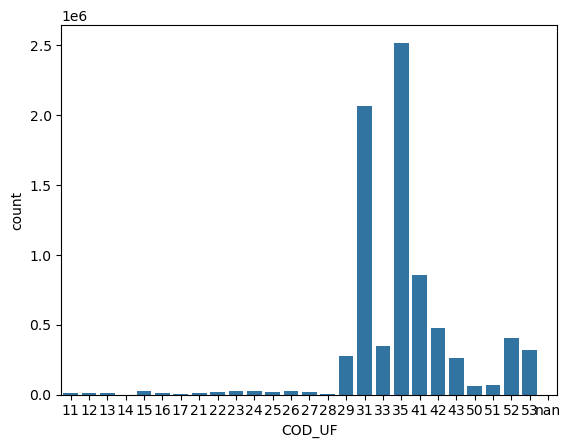

In [32]:
sns.countplot(x = dengue['COD_UF'])

<Axes: xlabel='SG_UF_NOT', ylabel='count'>

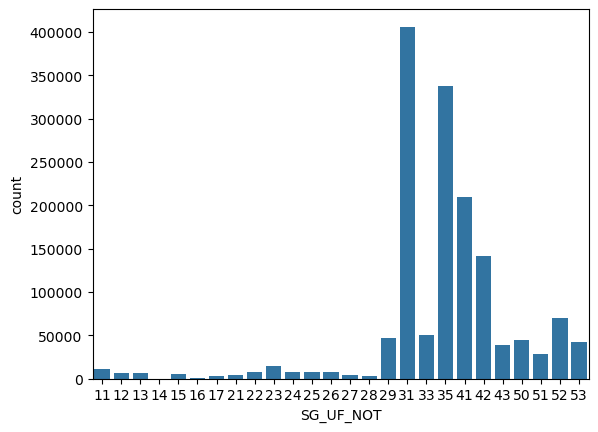

In [20]:
sns.countplot(x = dengue['SG_UF_NOT'])

In [33]:
dengue['ID_MUNICIP'].unique()

['313760', '317020', '314010', '317010', '316680', ..., '230015', '421440', '420555', '421650', '421085']
Length: 5309
Categories (5309, object): ['110001', '110002', '110003', '110004', ..., '522205', '522220', '522230', '530010']

In [ ]:
dengue['']

In [22]:
id_notif = ['DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE']

dengue = dengue.drop(columns = id_notif)

print(f"{len(id_notif)} colunas removidas: {id_notif}")

6 colunas removidas: ['DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE']


In [23]:
d_pac = ['DT_SIN_PRI', 'SEM_PRI', 'NU_IDADE_N', 'ANO_NASC', 'CS_RACA', 'CS_ESCOL_N']

for col in d_pac:
    if col in dengue.columns:
        dengue = dengue.drop(columns = d_pac)
        print(f"{len(d_pac)} colunas removidas: {d_pac}")

6 colunas removidas: ['DT_SIN_PRI', 'SEM_PRI', 'NU_IDADE_N', 'ANO_NASC', 'CS_RACA', 'CS_ESCOL_N']


In [24]:
resid = ['SG_UF', 'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'DT_INVEST', 'ID_OCUPA_N']

for col in resid:
    if col in dengue.columns:
        dengue = dengue.drop(columns = resid)
        print(f"{len(resid)} colunas removidas: {resid}")

6 colunas removidas: ['SG_UF', 'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'DT_INVEST', 'ID_OCUPA_N']


In [25]:
dengue['FEBRE'].unique()

<IntegerArray>
[1, 2, <NA>]
Length: 3, dtype: Int8

<Axes: xlabel='FEBRE', ylabel='count'>

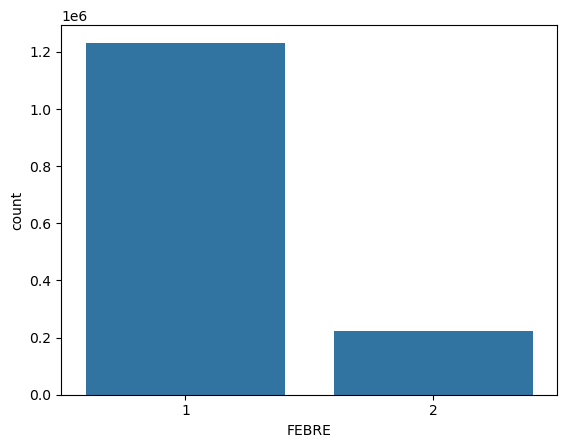

In [26]:
sns.countplot(x = dengue['FEBRE'])

<Axes: xlabel='VOMITO', ylabel='count'>

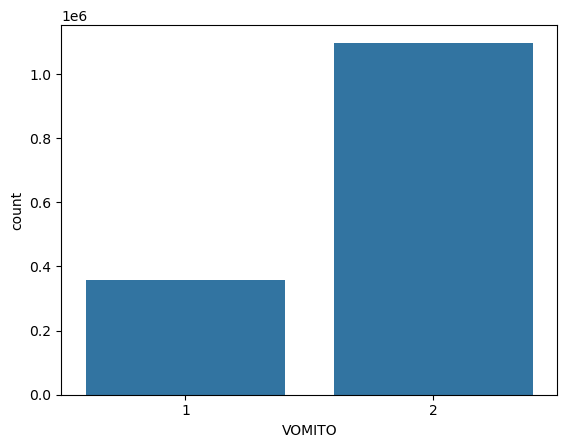

In [27]:
sns.countplot(x = dengue['VOMITO'])

<Axes: xlabel='EVOLUCAO', ylabel='count'>

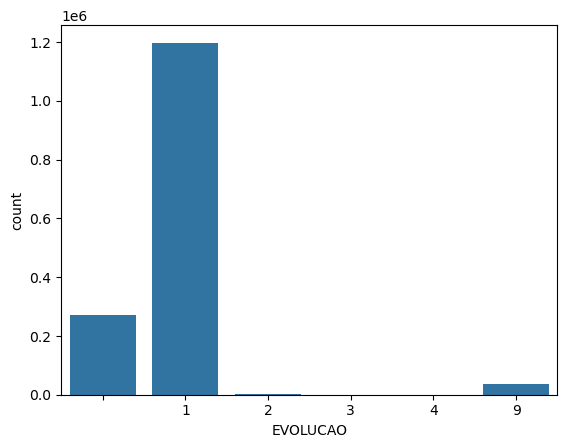

In [28]:
sns.countplot(x = dengue['EVOLUCAO'])

In [30]:
exames = ['DT_NS1', 'DT_VIRAL', 'DT_PCR']

for col in exames:
    if col in dengue.columns:
        dengue = dengue.drop(columns = exames)
        print(f"{len(exames)} colunas removidas: {exames}")

3 colunas removidas: ['DT_NS1', 'DT_VIRAL', 'DT_PCR']


In [31]:
hosp = ['DT_INTERNA', 'COUFINF', 'MUNICIPIO', 'TPAUTOCTO']

for col in hosp:
    if col in dengue.columns:
        dengue = dengue.drop(columns = hosp)
        print(f"{len(hosp)} colunas removidas: {hosp}")

4 colunas removidas: ['DT_INTERNA', 'COUFINF', 'MUNICIPIO', 'TPAUTOCTO']


In [32]:
encer = ['CRITERIO', 'DT_ENCERRA', 'DT_OBITO']

for col in encer:
    if col in dengue.columns:
        dengue = dengue.drop(columns = encer)
        print(f"{len(encer)} colunas removidas: {encer}")

3 colunas removidas: ['CRITERIO', 'DT_ENCERRA', 'DT_OBITO']


In [33]:
extra = ['ALRM_HIPOT','ALRM_PLAQ','ALRM_VOM','ALRM_SANG','ALRM_HEMAT','ALRM_ABDOM','ALRM_LETAR',
'ALRM_HEPAT','ALRM_LIQ','DT_ALRM','GRAV_PULSO','GRAV_CONV','GRAV_ENCH','GRAV_INSUF',
'GRAV_TAQUI','GRAV_EXTRE','GRAV_HIPOT','GRAV_HEMAT','GRAV_MELEN','GRAV_METRO','GRAV_SANG',
'GRAV_AST','GRAV_MIOC','GRAV_CONSC','GRAV_ORGAO','DT_GRAV','MANI_HEMOR','EPISTAXE','GENGIVO',
'METRO','PETEQUIAS','HEMATURA','SANGRAM','LACO_N','PLASMATICO','EVIDENCIA','PLAQ_MENOR',
'CON_FHD','COMPLICA','TP_SISTEMA','NDUPLIC_N','DT_DIGITA','CS_FLXRET','FLXRECEBI','MIGRADO_W',
'UF','COPAISINF','COMUNINF','CLASSI_FIN','DOENCA_TRA','CLINC_CHIK',
'DT_CHIK_S1','DT_CHIK_S2','RES_CHIKS1','RES_CHIKS2','RESUL_PRNT','DT_SORO']

In [34]:

for col in extra:
    if col in dengue.columns:
        dengue = dengue.drop(columns = extra)
        print(f"{len(extra)} colunas removidas: {extra}")

57 colunas removidas: ['ALRM_HIPOT', 'ALRM_PLAQ', 'ALRM_VOM', 'ALRM_SANG', 'ALRM_HEMAT', 'ALRM_ABDOM', 'ALRM_LETAR', 'ALRM_HEPAT', 'ALRM_LIQ', 'DT_ALRM', 'GRAV_PULSO', 'GRAV_CONV', 'GRAV_ENCH', 'GRAV_INSUF', 'GRAV_TAQUI', 'GRAV_EXTRE', 'GRAV_HIPOT', 'GRAV_HEMAT', 'GRAV_MELEN', 'GRAV_METRO', 'GRAV_SANG', 'GRAV_AST', 'GRAV_MIOC', 'GRAV_CONSC', 'GRAV_ORGAO', 'DT_GRAV', 'MANI_HEMOR', 'EPISTAXE', 'GENGIVO', 'METRO', 'PETEQUIAS', 'HEMATURA', 'SANGRAM', 'LACO_N', 'PLASMATICO', 'EVIDENCIA', 'PLAQ_MENOR', 'CON_FHD', 'COMPLICA', 'TP_SISTEMA', 'NDUPLIC_N', 'DT_DIGITA', 'CS_FLXRET', 'FLXRECEBI', 'MIGRADO_W', 'UF', 'COPAISINF', 'COMUNINF', 'CLASSI_FIN', 'DOENCA_TRA', 'CLINC_CHIK', 'DT_CHIK_S1', 'DT_CHIK_S2', 'RES_CHIKS1', 'RES_CHIKS2', 'RESUL_PRNT', 'DT_SORO']


In [35]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508653 entries, 0 to 1508652
Data columns (total 36 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   TP_NOT      1508653 non-null  category
 1   ID_AGRAVO   1508653 non-null  category
 2   SG_UF_NOT   1508653 non-null  category
 3   CS_SEXO     1508653 non-null  category
 4   CS_GESTANT  1508653 non-null  category
 5   FEBRE       1455699 non-null  Int8    
 6   MIALGIA     1455699 non-null  Int8    
 7   CEFALEIA    1455699 non-null  Int8    
 8   EXANTEMA    1455699 non-null  Int8    
 9   VOMITO      1455699 non-null  Int8    
 10  NAUSEA      1455699 non-null  Int8    
 11  DOR_COSTAS  1455699 non-null  Int8    
 12  CONJUNTVIT  1455699 non-null  Int8    
 13  ARTRITE     1455699 non-null  Int8    
 14  ARTRALGIA   1455699 non-null  Int8    
 15  PETEQUIA_N  1455699 non-null  Int8    
 16  LEUCOPENIA  1455699 non-null  Int8    
 17  LACO        1455699 non-null  Int8    
 18  DO

In [36]:
dengue.columns

Index(['TP_NOT', 'ID_AGRAVO', 'SG_UF_NOT', 'CS_SEXO', 'CS_GESTANT', 'FEBRE',
       'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS',
       'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA',
       'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL',
       'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE', 'DT_PRNT', 'RESUL_SORO',
       'RESUL_NS1', 'RESUL_VI_N', 'RESUL_PCR_', 'SOROTIPO', 'HISTOPA_N',
       'IMUNOH_N', 'HOSPITALIZ', 'EVOLUCAO'],
      dtype='object')

### Correção de dados faltantes

In [37]:

colunas = ['TP_NOT', 'ID_AGRAVO', 'SG_UF_NOT', 'CS_SEXO',
       'CS_GESTANT', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO',
       'ARTRALGIA', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL',
       'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE', 'DT_PRNT', 'RESUL_SORO',
       'RESUL_NS1', 'RESUL_VI_N', 'RESUL_PCR_', 'SOROTIPO', 'HISTOPA_N',
       'IMUNOH_N', 'HOSPITALIZ', 'EVOLUCAO']

for coluna in colunas:
    if coluna in dengue.columns and is_string_dtype(dengue[coluna]):
        count = dengue[coluna].str.contains(" ").sum()
        if count > 0:
            perc = (count / len(dengue)) * 100
            print(f"Na coluna '{coluna}' existem {count} valores ' ' ({perc:.2f}%)")

Na coluna 'ID_AGRAVO' existem 1508653 valores ' ' (100.00%)
Na coluna 'CS_SEXO' existem 6 valores ' ' (0.00%)
Na coluna 'CS_GESTANT' existem 248 valores ' ' (0.02%)
Na coluna 'DT_PRNT' existem 1508473 valores ' ' (99.99%)
Na coluna 'RESUL_SORO' existem 632329 valores ' ' (41.91%)
Na coluna 'RESUL_NS1' existem 572876 valores ' ' (37.97%)
Na coluna 'RESUL_VI_N' existem 823761 valores ' ' (54.60%)
Na coluna 'RESUL_PCR_' existem 797307 valores ' ' (52.85%)
Na coluna 'SOROTIPO' existem 1464550 valores ' ' (97.08%)
Na coluna 'HISTOPA_N' existem 888999 valores ' ' (58.93%)
Na coluna 'IMUNOH_N' existem 887961 valores ' ' (58.86%)
Na coluna 'HOSPITALIZ' existem 394063 valores ' ' (26.12%)
Na coluna 'EVOLUCAO' existem 270961 valores ' ' (17.96%)


In [38]:
cols_to_drop = []

for coluna in colunas:
    if coluna in dengue.columns and is_string_dtype(dengue[coluna]):
        count = dengue[coluna].str.contains(" ").sum()
        if count > 0:
            perc = (count / len(dengue)) * 100
            print(f"Na coluna '{coluna}' existem {count} valores ' ' ({perc:.2f}%)")

            # Mark for drop if more than 50%
            if perc > 50:
                cols_to_drop.append(coluna)


    # Drop the bad columns
dengue = dengue.drop(columns=cols_to_drop)

print(f"\nDropped {len(cols_to_drop)} columns: {cols_to_drop}")
print(f"Remaining columns: {dengue.shape[1]}")

Na coluna 'ID_AGRAVO' existem 1508653 valores ' ' (100.00%)
Na coluna 'CS_SEXO' existem 6 valores ' ' (0.00%)
Na coluna 'CS_GESTANT' existem 248 valores ' ' (0.02%)
Na coluna 'DT_PRNT' existem 1508473 valores ' ' (99.99%)
Na coluna 'RESUL_SORO' existem 632329 valores ' ' (41.91%)
Na coluna 'RESUL_NS1' existem 572876 valores ' ' (37.97%)
Na coluna 'RESUL_VI_N' existem 823761 valores ' ' (54.60%)
Na coluna 'RESUL_PCR_' existem 797307 valores ' ' (52.85%)
Na coluna 'SOROTIPO' existem 1464550 valores ' ' (97.08%)
Na coluna 'HISTOPA_N' existem 888999 valores ' ' (58.93%)
Na coluna 'IMUNOH_N' existem 887961 valores ' ' (58.86%)
Na coluna 'HOSPITALIZ' existem 394063 valores ' ' (26.12%)
Na coluna 'EVOLUCAO' existem 270961 valores ' ' (17.96%)

Dropped 7 columns: ['ID_AGRAVO', 'DT_PRNT', 'RESUL_VI_N', 'RESUL_PCR_', 'SOROTIPO', 'HISTOPA_N', 'IMUNOH_N']
Remaining columns: 29


In [39]:
dengue.columns

Index(['TP_NOT', 'SG_UF_NOT', 'CS_SEXO', 'CS_GESTANT', 'FEBRE', 'MIALGIA',
       'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT',
       'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO',
       'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA',
       'ACIDO_PEPT', 'AUTO_IMUNE', 'RESUL_SORO', 'RESUL_NS1', 'HOSPITALIZ',
       'EVOLUCAO'],
      dtype='object')

In [40]:
novacol = ['TP_NOT', 'SG_UF_NOT', 'CS_SEXO', 'CS_GESTANT', 'FEBRE',
       'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'ARTRALGIA', 'DOR_RETRO',
       'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA',
       'ACIDO_PEPT', 'AUTO_IMUNE', 'RESUL_SORO', 'RESUL_NS1', 'HOSPITALIZ',
       'EVOLUCAO']

for coluna in novacol:
  dengue[coluna] = dengue[coluna].replace(' ', np.nan)

C:\Users\camds\AppData\Local\Temp\ipykernel_40544\2429751357.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dengue[coluna] = dengue[coluna].replace(' ', np.nan)
C:\Users\camds\AppData\Local\Temp\ipykernel_40544\2429751357.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dengue[coluna] = dengue[coluna].replace(' ', np.nan)


In [41]:
dengue.isna().sum()

TP_NOT             0
SG_UF_NOT          0
CS_SEXO            6
CS_GESTANT       248
FEBRE          52954
MIALGIA        52954
CEFALEIA       52954
EXANTEMA       52954
VOMITO         52954
NAUSEA         52954
DOR_COSTAS     52954
CONJUNTVIT     52954
ARTRITE        52954
ARTRALGIA      52954
PETEQUIA_N     52954
LEUCOPENIA     52954
LACO           52954
DOR_RETRO      52954
DIABETES       52954
HEMATOLOG      52954
HEPATOPAT      52954
RENAL          52954
HIPERTENSA     52954
ACIDO_PEPT     52954
AUTO_IMUNE     52954
RESUL_SORO    632329
RESUL_NS1     572876
HOSPITALIZ    394063
EVOLUCAO      270961
dtype: int64

In [42]:
for coluna in novacol:
    if dengue[coluna].isna().any():
        moda = dengue[coluna].mode().iloc[0]
        dengue[coluna].fillna(moda, inplace=True)
        print(f"NA da coluna '{coluna}' substituída com a moda: {moda}")

C:\Users\camds\AppData\Local\Temp\ipykernel_40544\2474472615.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dengue[coluna].fillna(moda, inplace=True)


NA da coluna 'CS_SEXO' substituída com a moda: F
NA da coluna 'CS_GESTANT' substituída com a moda: 6
NA da coluna 'FEBRE' substituída com a moda: 1
NA da coluna 'MIALGIA' substituída com a moda: 1
NA da coluna 'CEFALEIA' substituída com a moda: 1
NA da coluna 'EXANTEMA' substituída com a moda: 2
NA da coluna 'VOMITO' substituída com a moda: 2
NA da coluna 'ARTRALGIA' substituída com a moda: 2
NA da coluna 'DOR_RETRO' substituída com a moda: 2
NA da coluna 'DIABETES' substituída com a moda: 2
NA da coluna 'HEMATOLOG' substituída com a moda: 2
NA da coluna 'HEPATOPAT' substituída com a moda: 2
NA da coluna 'RENAL' substituída com a moda: 2
NA da coluna 'HIPERTENSA' substituída com a moda: 2
NA da coluna 'ACIDO_PEPT' substituída com a moda: 2
NA da coluna 'AUTO_IMUNE' substituída com a moda: 2
NA da coluna 'RESUL_SORO' substituída com a moda: 4
NA da coluna 'RESUL_NS1' substituída com a moda: 4
NA da coluna 'HOSPITALIZ' substituída com a moda: 2
NA da coluna 'EVOLUCAO' substituída com a m

In [43]:
dengue.shape

(1508653, 29)

Deixando só os caso de morte por dengue e cura

In [44]:
evolucao = ["1", "2"]
dengue = dengue.query("EVOLUCAO in @evolucao")

In [45]:
dengue.shape

(1470162, 29)

## Divisão entre previsores (X) e classe (y)

In [46]:
dengue.columns

Index(['TP_NOT', 'SG_UF_NOT', 'CS_SEXO', 'CS_GESTANT', 'FEBRE', 'MIALGIA',
       'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT',
       'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO',
       'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA',
       'ACIDO_PEPT', 'AUTO_IMUNE', 'RESUL_SORO', 'RESUL_NS1', 'HOSPITALIZ',
       'EVOLUCAO'],
      dtype='object')

In [47]:
X_dengue = dengue.iloc[:,0:21].values

In [48]:
X_dengue

array([['2', '31', 'M', ..., 2, 2, 2],
       ['2', '31', 'F', ..., 2, 2, 2],
       ['2', '31', 'F', ..., 2, 2, 2],
       ...,
       ['2', '35', 'F', ..., 2, 2, 2],
       ['2', '35', 'F', ..., 2, 2, 2],
       ['2', '35', 'F', ..., 2, 2, 2]], dtype=object)

In [49]:
X_dengue[0]

array(['2', '31', 'M', '6', 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2], dtype=object)

In [50]:
y_dengue = dengue.iloc[:,21].values

In [51]:
y_dengue

<IntegerArray>
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
 ...
 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Length: 1470162, dtype: Int8

In [52]:
y_dengue[0]

np.int8(2)

In [53]:
import pickle

with open('dengue.pkl', mode = 'wb') as f:
    pickle.dump([X_dengue, y_dengue], f)

## Tratamento de atributos categóricos

In [54]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470162 entries, 0 to 1508652
Data columns (total 29 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   TP_NOT      1470162 non-null  category
 1   SG_UF_NOT   1470162 non-null  category
 2   CS_SEXO     1470162 non-null  category
 3   CS_GESTANT  1470162 non-null  category
 4   FEBRE       1470162 non-null  Int8    
 5   MIALGIA     1470162 non-null  Int8    
 6   CEFALEIA    1470162 non-null  Int8    
 7   EXANTEMA    1470162 non-null  Int8    
 8   VOMITO      1470162 non-null  Int8    
 9   NAUSEA      1417209 non-null  Int8    
 10  DOR_COSTAS  1417209 non-null  Int8    
 11  CONJUNTVIT  1417209 non-null  Int8    
 12  ARTRITE     1417209 non-null  Int8    
 13  ARTRALGIA   1470162 non-null  Int8    
 14  PETEQUIA_N  1417209 non-null  Int8    
 15  LEUCOPENIA  1417209 non-null  Int8    
 16  LACO        1417209 non-null  Int8    
 17  DOR_RETRO   1470162 non-null  Int8    
 18  DIABETE

In [55]:
dengue.describe().T

,count,mean,std,min,25%,50%,75%,max
FEBRE,1470162.0,1.145661,0.352766,1.0,1.0,1.0,1.0,2.0
MIALGIA,1470162.0,1.191628,0.393582,1.0,1.0,1.0,1.0,2.0
CEFALEIA,1470162.0,1.20167,0.401247,1.0,1.0,1.0,1.0,2.0
EXANTEMA,1470162.0,1.88892,0.314232,1.0,2.0,2.0,2.0,2.0
VOMITO,1470162.0,1.76177,0.426001,1.0,2.0,2.0,2.0,2.0
NAUSEA,1417209.0,1.609898,0.487773,1.0,1.0,2.0,2.0,2.0
DOR_COSTAS,1417209.0,1.704593,0.456226,1.0,1.0,2.0,2.0,2.0
CONJUNTVIT,1417209.0,1.96453,0.184964,1.0,2.0,2.0,2.0,2.0
ARTRITE,1417209.0,1.896889,0.304104,1.0,2.0,2.0,2.0,2.0
ARTRALGIA,1470162.0,1.81392,0.389171,1.0,2.0,2.0,2.0,2.0


In [56]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [57]:
label_encoder_sexo = LabelEncoder()

In [58]:
X_dengue[:,2] = label_encoder_sexo.fit_transform(X_dengue[:,2])

In [59]:
X_dengue[0]

array(['2', '31', 2, '6', 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2], dtype=object)

In [60]:
dengue.columns

Index(['TP_NOT', 'SG_UF_NOT', 'CS_SEXO', 'CS_GESTANT', 'FEBRE', 'MIALGIA',
       'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT',
       'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO',
       'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA',
       'ACIDO_PEPT', 'AUTO_IMUNE', 'RESUL_SORO', 'RESUL_NS1', 'HOSPITALIZ',
       'EVOLUCAO'],
      dtype='object')

In [61]:
X_dengue = dengue.iloc[:,0:21].copy()
y_dengue = dengue.iloc[:,21].copy()

In [62]:
cat_col = X_dengue.select_dtypes(include = ['category']).columns.tolist()

In [63]:
cat_col

['TP_NOT', 'SG_UF_NOT', 'CS_SEXO', 'CS_GESTANT']

In [64]:
X_cat = X_dengue[cat_col]

In [65]:
one_hot_encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

In [66]:
X_encod = one_hot_encoder.fit_transform(X_cat)

In [67]:
X_encod

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [68]:
print(one_hot_encoder.feature_names_in_)

['TP_NOT' 'SG_UF_NOT' 'CS_SEXO' 'CS_GESTANT']


In [69]:
enc_col_name = one_hot_encoder.get_feature_names_out(cat_col)

In [70]:
X_enc_df = pd.DataFrame(X_encod, columns = enc_col_name)

In [71]:
X_enc_df.head()

,TP_NOT_2,TP_NOT_3,SG_UF_NOT_11,SG_UF_NOT_12,SG_UF_NOT_13,SG_UF_NOT_14,SG_UF_NOT_15,SG_UF_NOT_16,SG_UF_NOT_17,SG_UF_NOT_21,SG_UF_NOT_22,SG_UF_NOT_23,SG_UF_NOT_24,SG_UF_NOT_25,SG_UF_NOT_26,SG_UF_NOT_27,SG_UF_NOT_28,SG_UF_NOT_29,SG_UF_NOT_31,SG_UF_NOT_33,SG_UF_NOT_35,SG_UF_NOT_41,SG_UF_NOT_42,SG_UF_NOT_43,SG_UF_NOT_50,SG_UF_NOT_51,SG_UF_NOT_52,SG_UF_NOT_53,CS_SEXO_F,CS_SEXO_I,CS_SEXO_M,CS_GESTANT_1,CS_GESTANT_2,CS_GESTANT_3,CS_GESTANT_4,CS_GESTANT_5,CS_GESTANT_6,CS_GESTANT_9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
X_dengue = X_enc_df

### Escalonamento dos valores

In [73]:
from sklearn.preprocessing import StandardScaler

scaler_dengue = StandardScaler()
X_dengue = scaler_dengue.fit_transform(X_dengue)

In [74]:
X_dengue

array([[ 1.64948355e-03, -1.64948355e-03, -8.48385896e-02, ...,
        -7.42461367e-01,  8.87029059e-01, -2.89011839e-01],
       [ 1.64948355e-03, -1.64948355e-03, -8.48385896e-02, ...,
        -7.42461367e-01,  8.87029059e-01, -2.89011839e-01],
       [ 1.64948355e-03, -1.64948355e-03, -8.48385896e-02, ...,
        -7.42461367e-01, -1.12735878e+00,  3.46006587e+00],
       ...,
       [ 1.64948355e-03, -1.64948355e-03, -8.48385896e-02, ...,
        -7.42461367e-01, -1.12735878e+00,  3.46006587e+00],
       [ 1.64948355e-03, -1.64948355e-03, -8.48385896e-02, ...,
        -7.42461367e-01, -1.12735878e+00,  3.46006587e+00],
       [ 1.64948355e-03, -1.64948355e-03, -8.48385896e-02, ...,
        -7.42461367e-01, -1.12735878e+00,  3.46006587e+00]])

In [75]:
import pickle
with open('dengue_data_preprocessados.pkl', mode = 'wb') as f:
  pickle.dump([X_dengue, y_dengue], f)

# **BALANCEAMENTO DO** **DATASET**

**Importando as bibliotecas**

In [76]:
import pickle, numpy as np, pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from collections import Counter


Abrindo o arquivo préprocessado

In [77]:
with open("./dengue_data_preprocessados.pkl", "rb") as f:
    X, y = pickle.load(f)

X = np.asarray(X, dtype=np.float32)

if not np.issubdtype(np.array(y).dtype, np.number):
    y = LabelEncoder().fit_transform(y)
y = np.asarray(y).ravel().astype(np.int64)

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print("TREINO (sem balancear):", dict(Counter(y_tr)))
print("TESTE  (inalterado)   :", dict(Counter(y_te)))


TREINO (sem balancear): {np.int64(2): 1024116, np.int64(1): 4997}
TESTE  (inalterado)   : {np.int64(2): 438908, np.int64(1): 2141}


**Balanceamento do Dataset - Aplicando o SMOTE -  Somente nos dataset de Treino**

In [78]:
ros = RandomOverSampler(random_state=42)
X_tr_bal, y_tr_bal = ros.fit_resample(X_tr, y_tr)
print("TREINO (ROS)          :", dict(Counter(y_tr_bal)))

TREINO (ROS)          : {np.int64(2): 1024116, np.int64(1): 1024116}


**Balanceamento do Dataset - Aplicando o Tomek -  Somente nos dataset de Treino**

In [ ]:
# Aplicando Tomek Links
tl = TomekLinks(sampling_strategy='auto')  # 'auto' remove da classe majoritária
X_tr_tl, y_tr_tl = tl.fit_resample(X_tr, y_tr)

**Aplicar os modelos de aprendizados de máquina que usem os seguintes algoritimos : Naive Bayes, Random Forest e SVM**

In [ ]:
# Define os modelos que serão usados

modelos = {
    "NaiveBayes": GaussianNB(),
    "RandomForest": RandomForestClassifier(
        n_estimators=50,     # menos árvores
        max_depth=8,         # floresta rasa
        min_samples_leaf=5,  # evita overfit e acelera
        n_jobs=-1,
        random_state=42
    ),
    # "SVM" linear via SGD (bem mais leve que SVC/RBF)
    "LinearSVM_SGD": SGDClassifier(
        loss="hinge",        # SVM linear
        alpha=1e-4,
        max_iter=2000,
        tol=1e-3,
        n_jobs=-1,
        random_state=42
    ),
}


def avalia(clf, Xtr, ytr, Xte, yte):
    clf.fit(Xtr, ytr)
    pred = clf.predict(Xte)
    return {
        "accuracy": round(accuracy_score(yte, pred), 4),
        "precision_macro": round(precision_score(yte, pred, average="macro", zero_division=0), 4),
        "recall_macro": round(recall_score(yte, pred, average="macro", zero_division=0), 4),
        "f1_macro": round(f1_score(yte, pred, average="macro", zero_division=0), 4),
    }

**AGORA SEM BALANCEAR OS DADOS**

In [ ]:
# sem balancear
linhas = []
for nome, clf in modelos.items():
    m = avalia(clf, X_tr, y_tr, X_te, y_te)
    m.update({"versao": "Sem balancear", "modelo": nome})
    linhas.append(m)

for nome, clf in modelos.items():
    m = avalia(clf, X_tr_bal, y_tr_bal, X_te, y_te)
    m.update({"versao": "Balanceado (ROS)", "modelo": nome})
    linhas.append(m)


In [ ]:
for nome, clf in modelos.items():
    m = avalia(clf, X_tr_tl, y_tr_tl, X_te, y_te)
    m.update({"versao": "Balanceado (Tomek)", "modelo": nome})
    linhas.append(m)

**Plotando as métricas dos modelos para Análise**

In [ ]:
tabela = pd.DataFrame(linhas)[
    ["versao", "modelo", "accuracy", "precision_macro", "recall_macro", "f1_macro"]
]
# salvar CSV
print(tabela.to_string(index=False))

            versao        modelo  accuracy  precision_macro  recall_macro  f1_macro
     Sem balancear    NaiveBayes    0.0587           0.5011        0.5119    0.0564
     Sem balancear  RandomForest    0.9951           0.4976        0.5000    0.4988
     Sem balancear LinearSVM_SGD    0.9951           0.4976        0.5000    0.4988
  Balanceado (ROS)    NaiveBayes    0.0586           0.5011        0.5119    0.0563
  Balanceado (ROS)  RandomForest    0.6058           0.5010        0.5477    0.3828
  Balanceado (ROS) LinearSVM_SGD    0.5118           0.5008        0.5430    0.3436
Balanceado (Tomek)    NaiveBayes    0.0587           0.5011        0.5119    0.0564
Balanceado (Tomek)  RandomForest    0.9951           0.4976        0.5000    0.4988
Balanceado (Tomek) LinearSVM_SGD    0.9951           0.4976        0.5000    0.4988


## GridSearch + Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             make_scorer, classification_report)

In [ ]:
modelos = {
    "NaiveBayes": GaussianNB(),
    "RandomForest": RandomForestClassifier(n_jobs=-1, random_state=42),
    "LinearSVM_SGD": SGDClassifier(loss="hinge", random_state=42, n_jobs=-1)
}

# Grids (ajuste à vontade)
param_grids = {
    "NaiveBayes": {
        "model__var_smoothing": [1e-9, 1e-8, 1e-7]
    },
    "RandomForest": {
        "model__n_estimators": [50, 100, 200],
        "model__max_depth": [5, 10, None],
        "model__min_samples_leaf": [1, 5, 10]
    },
    "LinearSVM_SGD": {
        "model__alpha": [1e-3, 1e-4, 1e-5],
        "model__penalty": ["l2", "elasticnet"],
        "model__max_iter": [1000, 2000],
        "model__tol": [1e-3]
    }
}

In [ ]:
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision_macro": make_scorer(precision_score, average="macro", zero_division=0),
    "recall_macro": make_scorer(recall_score, average="macro", zero_division=0),
    "f1_macro": make_scorer(f1_score, average="macro", zero_division=0)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def metrics_dict(y_true, y_pred):
    return {
        "accuracy": round(accuracy_score(y_true, y_pred), 4),
        "precision_macro": round(precision_score(y_true, y_pred, average="macro", zero_division=0), 4),
        "recall_macro": round(recall_score(y_true, y_pred, average="macro", zero_division=0), 4),
        "f1_macro": round(f1_score(y_true, y_pred, average="macro", zero_division=0), 4),
    }

In [ ]:
resultados = []

for nome, est in modelos.items():
    print(f"\n===== {nome} =====")
    pipe = Pipeline([("model", est)])

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[nome],
        scoring=scoring,
        refit="f1_macro",          # escolhe o melhor por f1_macro
        cv=cv,
        n_jobs=-1,
        verbose=1,
        return_train_score=False
    )
    grid.fit(X_tr_bal, y_tr_bal)

    # Métricas de CV (melhor ponto)
    best = grid.best_estimator_
    best_cv = {
        "modelo": nome,
        "cv_accuracy": round(grid.cv_results_["mean_test_accuracy"][grid.best_index_], 4),
        "cv_precision_macro": round(grid.cv_results_["mean_test_precision_macro"][grid.best_index_], 4),
        "cv_recall_macro": round(grid.cv_results_["mean_test_recall_macro"][grid.best_index_], 4),
        "cv_f1_macro": round(grid.cv_results_["mean_test_f1_macro"][grid.best_index_], 4),
        "best_params": grid.best_params_
    }

    # Métricas no TESTE
    pred = best.predict(X_te)
    mtest = metrics_dict(y_te, pred)

    print("Melhores hiperparâmetros:", grid.best_params_)
    print("CV (f1_macro):", best_cv["cv_f1_macro"])
    print("\nRelatório de teste:")
    print(classification_report(y_te, pred, digits=4))

    resultados.append({
        **best_cv,
        "test_accuracy": mtest["accuracy"],
        "test_precision_macro": mtest["precision_macro"],
        "test_recall_macro": mtest["recall_macro"],
        "test_f1_macro": mtest["f1_macro"],
    })

# Tabela comparativa
df_result = pd.DataFrame(resultados).sort_values(by="test_f1_macro", ascending=False)
print("\n===== Ranking (TESTE - f1_macro) =====")
print(df_result[[
    "modelo", "cv_f1_macro", "test_f1_macro",
    "cv_accuracy", "test_accuracy",
    "cv_precision_macro", "test_precision_macro",
    "cv_recall_macro", "test_recall_macro",
    "best_params"
]])


===== NaiveBayes =====
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Melhores hiperparâmetros: {'model__var_smoothing': 1e-07}
CV (f1_macro): 0.3837

Relatório de teste:
              precision    recall  f1-score   support

           1     0.0050    0.9696    0.0099      2141
           2     0.9973    0.0542    0.1029    438908

    accuracy                         0.0587    441049
   macro avg     0.5011    0.5119    0.0564    441049
weighted avg     0.9925    0.0587    0.1024    441049


===== RandomForest =====
Fitting 5 folds for each of 27 candidates, totalling 135 fits
